# Settings & Initialisation

In [1]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

from comtrade.analysis import Analysis
tta = Analysis()

## Reporter Area

In [2]:
from comtrade.code.reporter_area import ReporterArea
reporter_area = ReporterArea()
reporter_area_ids = reporter_area.get_ids("India")
reporter_area_ids

[{'id': '699', 'text': 'India'}, {'id': '356', 'text': 'India, excl. Sikkim'}]

## Partner Area

In [43]:
from comtrade.code.partner_area import PartnerArea
partner_area = PartnerArea()
partner_area_ids = partner_area.get_ids("Korea")
partner_area_ids

[{'id': '408', 'text': "Dem. People's Rep. of Korea"},
 {'id': '410', 'text': 'Rep. of Korea'}]

## Trade Regime

In [4]:
from comtrade.code.trade_regime import TradeRegime
trade_regime = TradeRegime()
trade_regime_ids = trade_regime.get_ids("Export")
trade_regime_ids

[{'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}]

## Data availability request

In [44]:
source = 699 # India
destination = 410 # S Korea
tta.set_source_destination(source, destination)

# source_status = tta.source_data_available()
# print(source_status)
# destination_status = tta.destination_data_available()
# print(destination_status)

## Data request

In [45]:
data = tta.compare_export(2019, 'AG4')

{'r': 699, 'p': 410, 'rg': 2, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': 410, 'p': 699, 'rg': 1, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


## Data Frame

In [46]:
import pandas as pd
pd.set_option('display.max_rows', 5000)

In [51]:
df = pd.DataFrame.from_dict(data, orient='index')
df['value_diff'] = df['value_a'] - df['value_b']
df['quantity_diff'] = df['quantity_a'] - df['quantity_b']
df.sort_values(by=['value_diff'])
df

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff
2804,2804,"Hydrogen, rare gases and other non-metals",1287,No Quantity,29053,2692,No Quantity,471,28582,-1405
4012,4012,Retreaded or used pneumatic tyres of rubber; s...,49895,No Quantity,177612,88422,Weight in kilograms,174357,3255,-38527
4202,4202,"Trunks; suit, camera, jewellery, cutlery cases...",47055,No Quantity,3816687,493308,No Quantity,17257259,-13440572,-446253
6117,6117,"Clothing accessories; made up, knitted or croc...",1082,No Quantity,60011,615,No Quantity,150611,-90600,467
6207,6207,"Singlets and other vests, underpants, briefs, ...",14807,No Quantity,506299,14821,No Quantity,404500,101799,-14
6208,6208,"Singlets and other vests, slips, petticoats, b...",36961,No Quantity,835525,46513,No Quantity,1362934,-527409,-9552
6210,6210,Garments made up of fabrics of heading no. 560...,1185,No Quantity,80656,1983,No Quantity,106754,-26098,-798
6211,6211,"Track suits, swimwear and other garments (not ...",17097,No Quantity,839425,136740,No Quantity,3650463,-2811038,-119643
6506,6506,"Headgear; n.e.c. in chapter 65, whether or not...",440,No Quantity,5857,289,No Quantity,7481,-1624,151
7007,7007,"Safety glass, consisting of toughened (tempere...",271715,No Quantity,794244,146129,No Quantity,1007292,-213048,125586


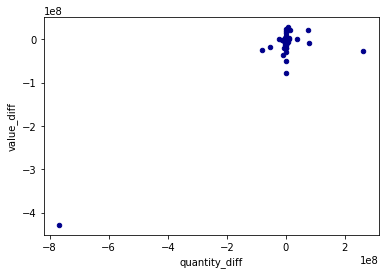

In [48]:
df.plot.scatter(x='quantity_diff', y='value_diff', c='DarkBlue')

## Reexport

In [39]:
rd = tta.api.get_data(392, 699, 3, 2019, aggregation = 'AG2')
rd

{'r': 392, 'p': 699, 'rg': 3, 'ps': 2019, 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


{'validation': {'status': {'name': 'Ok',
   'value': 0,
   'category': 0,
   'description': '',
   'helpUrl': 'For more reference visit http://comtrade.un.org/data/dev/portal/'},
  'message': None,
  'count': {'value': 0,
   'started': '2020-06-16T21:34:49.3931978+02:00',
   'finished': '2020-06-16T21:34:49.7369481+02:00',
   'durationSeconds': 0.3437503},
  'datasetTimer': {'started': '2020-06-16T21:34:49.3931978+02:00',
   'finished': '2020-06-16T21:34:50.3009683+02:00',
   'durationSeconds': 0.9077704999999999}},
 'dataset': []}